In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [2]:
train_data = pd.read_excel(r"C:\Users\siddh\Flight_Price_resources/Data_Train.xlsx")

In [3]:
#raw data
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [4]:
train_data.tail(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


# Data Cleaning

In [5]:
#dealing with missing values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data['Route'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Route, Length: 10683, dtype: bool

In [8]:
train_data[train_data['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [9]:
#deleting row which contain NaN values
train_data.dropna(inplace=True)

In [10]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [12]:
train_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.2 MB


In [13]:
#copy of dataset
dataset = train_data.copy()

In [14]:
dataset.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [15]:
dataset.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [16]:
#converting datetime feature from datatype object to timestamp
#Date_of_Journey, Dep_Time, Arrival_Time

def change_into_datetime(col):
    dataset[col] = pd.to_datetime(dataset[col])

In [17]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [18]:
for col in ['Dep_Time', 'Arrival_Time', 'Date_of_Journey']:
    change_into_datetime(col)

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [20]:
dataset['Journey_Day'] = dataset['Date_of_Journey'].dt.day

In [21]:
dataset['Journey_Month'] = dataset['Date_of_Journey'].dt.month

In [22]:
dataset['Journey_Year'] = dataset['Date_of_Journey'].dt.year

In [23]:
dataset.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-10-11 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019


In [24]:
#lets try to clean the Dep_Time & Arrival_Time & and then extract Derived attributes 

In [25]:
def extract_hour_min(df, col):
    df[col+'_hour'] = df[col].dt.hour
    df[col+'_min'] = df[col].dt.minute
    return df.head(3)

In [26]:
for col in ["Dep_Time","Arrival_Time"]:
    xyz = extract_hour_min(dataset,col)

In [27]:
xyz

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-10-11 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-10-11 05:50:00,2023-10-11 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-10-11 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25,4,25


In [28]:
cols_to_drop = ['Dep_Time','Arrival_Time']
dataset.drop(cols_to_drop, axis=1, inplace=True)

In [29]:
dataset.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10


# Data Analysis

In [30]:
#Lets analyze when most of the flight take off

In [31]:
def flight_def_time(x):
    
    if(x>4) and (x<=8):
        return "Early Morning"
    elif(x>8) and (x<=12):
        return "Morning"
    elif(x>12) and (x<=16):
        return "Noon"
    elif(x>16) and (x<=20):
        return "Evening"
    elif(x>20) and (x<=24):
        return "Night"
    else:
        return "Late Night"
    


In [32]:
dataset['Dep_Time_hour'].apply(flight_def_time).value_counts()

Early Morning    2880
Evening          2357
Morning          2209
Noon             1731
Night            1040
Late Night        465
Name: Dep_Time_hour, dtype: int64

<AxesSubplot:>

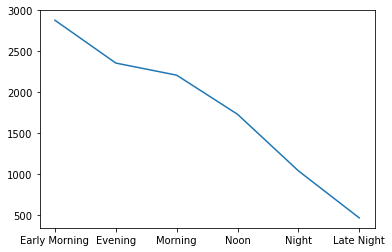

In [33]:
dataset['Dep_Time_hour'].apply(flight_def_time).value_counts().plot()

<AxesSubplot:>

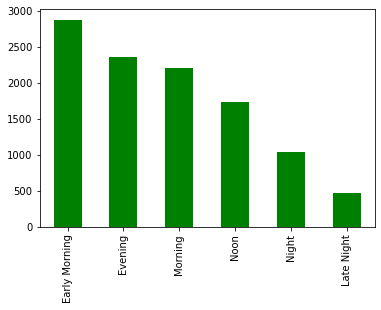

In [34]:
dataset['Dep_Time_hour'].apply(flight_def_time).value_counts().plot(kind='bar',color='g')

In [35]:
!pip install plotly
!pip install chart_studio
!pip install cufflinks

In [36]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot,iplot,init_notebook_mode,download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

In [37]:
dataset['Dep_Time_hour'].apply(flight_def_time).value_counts().iplot(kind='bar',color='green')

# Pre-Processing of Duration Feature

In [38]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' + '0m'
    
    return x
    

In [39]:
dataset['Duration'] = dataset['Duration'].apply(preprocess_duration)

In [40]:
dataset['Duration_hour'] = dataset["Duration"].apply(lambda x: int(x.split(' ')[0][0:-1]))

In [41]:
dataset['Duration_min'] = dataset["Duration"].apply(lambda x: int(x.split(' ')[1][0:-1]))

In [42]:
dataset.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0


In [43]:
#lets analyze whether duration feature impacts price or not 

In [44]:
#converting duration feature (2h 1m) into minutes (int)
dataset['Duration_total_minutes'] = dataset['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [45]:
dataset['Duration_total_minutes']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_total_minutes, Length: 10682, dtype: int64

In [46]:
#using scatter plots or regression plots to find the correlation, relationship and best fit line between "Duration" and "Price"

<AxesSubplot:xlabel='Duration_total_minutes', ylabel='Price'>

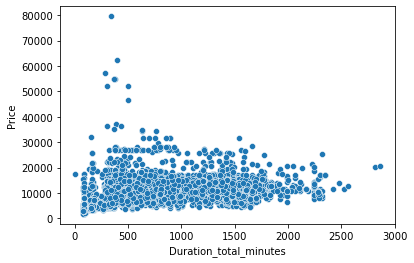

In [47]:
sns.scatterplot(x='Duration_total_minutes',y='Price',data=dataset)

<AxesSubplot:xlabel='Duration_total_minutes', ylabel='Price'>

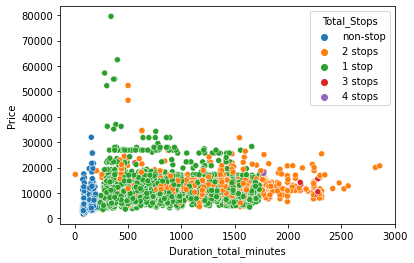

In [48]:
sns.scatterplot(x='Duration_total_minutes',y='Price',hue='Total_Stops',data=dataset)

In [49]:
#on which route jet airways is extremely used ?
dataset['Airline'] == 'Jet Airways'

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [50]:
dataset[dataset['Airline'] == 'Jet Airways']

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min,Duration_total_minutes
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
6,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,2019,18,55,10,25,15,30,930
7,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,2019,8,0,5,5,21,5,1265
8,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,2019,8,55,10,25,25,30,1530
13,Jet Airways,2019-09-05,Kolkata,Banglore,CCU → BOM → BLR,12h 10m,1 stop,In-flight meal not included,9663,5,9,2019,21,10,9,20,12,10,730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10668,Jet Airways,2019-09-05,Delhi,Cochin,DEL → JDH → BOM → COK,7h 20m,2 stops,No info,21219,5,9,2019,11,40,19,0,7,20,440
10672,Jet Airways,2019-06-27,Delhi,Cochin,DEL → AMD → BOM → COK,19h 55m,2 stops,In-flight meal not included,11150,27,6,2019,23,5,19,0,19,55,1195
10673,Jet Airways,2019-05-27,Delhi,Cochin,DEL → AMD → BOM → COK,15h 0m,2 stops,No info,16704,27,5,2019,13,25,4,25,15,0,900
10674,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,24h 45m,1 stop,In-flight meal not included,11087,3,12,2019,20,35,21,20,24,45,1485


In [51]:
dataset[dataset['Airline'] == 'Jet Airways'].groupby('Route').count()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min,Duration_total_minutes
Route,,,,,,,,,,,,,,,,,,
BLR → BDQ → DEL,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
BLR → BOM → DEL,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385
BLR → BOM → JDH → DEL,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
BLR → DEL,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382
BLR → MAA → DEL,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
BOM → BDQ → DEL → HYD,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
BOM → DED → DEL → HYD,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
BOM → DEL → HYD,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
BOM → HYD,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207


In [52]:
dataset[dataset['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
DEL → JAI → BOM → COK    207
BOM → HYD                207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
BOM → BDQ → DEL → HYD      2
DEL → DED → BOM → COK      2
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → VNS → DEL → HYD      1
BOM → DED → DEL → HYD      1
DEL → CCU → BOM → COK      1
dtype: int64

In [53]:
#Airline vs Price analysis

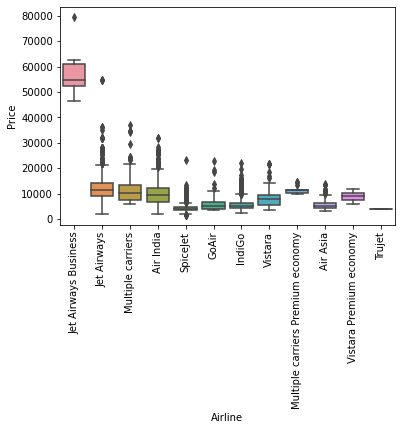

In [54]:
sns.boxplot(x='Airline',y='Price',data=dataset.sort_values('Price',ascending=False))
plt.xticks(rotation='vertical')
plt.show()

# Feature Engineering

In [55]:
#applying one-hot encoding on data
#Source, Destination features are have nominal data means which dont have any order
#for Nominal Data one-hot encoding is preferred
#for ordinal Data label encoding is preferred

In [56]:
#lets create categorical featurem(dtype of object) list to apply feature encoding

In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Airline                 10682 non-null  object        
 1   Date_of_Journey         10682 non-null  datetime64[ns]
 2   Source                  10682 non-null  object        
 3   Destination             10682 non-null  object        
 4   Route                   10682 non-null  object        
 5   Duration                10682 non-null  object        
 6   Total_Stops             10682 non-null  object        
 7   Additional_Info         10682 non-null  object        
 8   Price                   10682 non-null  int64         
 9   Journey_Day             10682 non-null  int64         
 10  Journey_Month           10682 non-null  int64         
 11  Journey_Year            10682 non-null  int64         
 12  Dep_Time_hour           10682 non-null  int64 

In [58]:
cat_col = [col for col in dataset.columns if dataset[col].dtypes == 'O']

In [59]:
#lets create separate list of numerical features 

In [60]:
num_col = [col for col in dataset.columns if dataset[col].dtypes != 'O']

In [61]:
#implementing one-hot encoding from scratch for Source feature

In [62]:
for categories in dataset['Source'].unique():
    dataset['Source_'+categories] = dataset['Source'].apply(lambda x: 1 if x == categories else 0 )

In [63]:
dataset.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min,Duration_total_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0


In [64]:
#applying encoding on Airline feature

In [65]:
dataset['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [66]:
dataset['Airline'].nunique()

12

In [67]:
#if we encode Airline feature using one-hot encoding it will create 12 extra columns that lead to curse of dimension problem

In [68]:
#so, lets perform target guided encoding

In [69]:
#lets find average price of ticket for each airline

In [70]:
dataset.groupby('Airline')['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [71]:
airlines = dataset.groupby('Airline')['Price'].mean().sort_values().index

In [72]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [73]:
dict_airlines = {key:index for (index,key) in enumerate(airlines,0)}

In [74]:
dataset['Airline'] = dataset['Airline'].map(dict_airlines)

In [75]:
dataset['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [76]:
#encoding destination feature

In [77]:
dataset['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [78]:
dataset['Destination'] = dataset['Destination'].replace('New Delhi','Delhi')

In [79]:
dataset['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [80]:
destinations = dataset.groupby('Destination')['Price'].mean().sort_values().index

In [81]:
destinations

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [82]:
dict_destinations = {key:index for (index,key) in enumerate(destinations,0)}

In [83]:
dict_destinations

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [84]:
dataset['Destination'] = dataset['Destination'].map(dict_destinations)

In [85]:
dataset['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [86]:
dataset.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min,Duration_total_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0


In [87]:
#Performing manual encoding on data (Total_Stops)

In [88]:
dataset['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [89]:
#Total stops feature have ordinal data so label encoding is most preferable for this

In [90]:
#implementing label encoding from scratch

In [91]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [92]:
dataset['Total_Stops'] = dataset['Total_Stops'].map(stop)

In [93]:
dataset['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [94]:
#Removing Uncessary Features 

In [95]:
dataset.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'Journey_Year', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Duration_hour',
       'Duration_min', 'Duration_total_minutes', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [96]:
dataset['Additional_Info']

0        No info
1        No info
2        No info
3        No info
4        No info
          ...   
10678    No info
10679    No info
10680    No info
10681    No info
10682    No info
Name: Additional_Info, Length: 10682, dtype: object

In [97]:
dataset['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [98]:
dataset['Additional_Info'].value_counts()/len(dataset)*100

No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
2 Long layover                   0.009362
Red-eye flight                   0.009362
1 Short layover                  0.009362
Name: Additional_Info, dtype: float64

In [99]:
dataset.drop(columns = ['Date_of_Journey','Route','Duration','Additional_Info','Duration_total_minutes','Source','Journey_Year'],axis=1,inplace=True)

In [100]:
dataset.head(2)

,Airline,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


In [101]:
#Outliers detection
#Outliers - values which are extremely low or high (present only in numericals feature)

In [102]:
#box plot,histogram and distribution chart are the best way to detect outliers

In [103]:
def plot(df,col):
    fig, (ax1,ax2,ax3) = plt.subplots(3,1)
    
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3, kde=False) #histogram

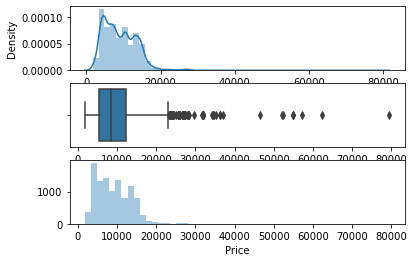

In [104]:
plot(dataset,"Price")

In [105]:
q1 = dataset['Price'].quantile(0.25)
q3 = dataset['Price'].quantile(0.75)

IQR = q3 - q1 #interquantile range 

maximum = q3 + 1.5*IQR
minimum = q1 - 1.5*IQR

In [106]:
#value greater then maximum and less then minimum consider as outlier

In [107]:
print([price for price in dataset['Price'] if price > maximum or price < minimum ])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [108]:
len([price for price in dataset['Price'] if price > maximum or price < minimum ])

94

In [109]:
#replacing outliers with median values 

In [110]:
dataset['Price'] = np.where(dataset['Price'] > maximum, dataset['Price'].median(), dataset['Price'])

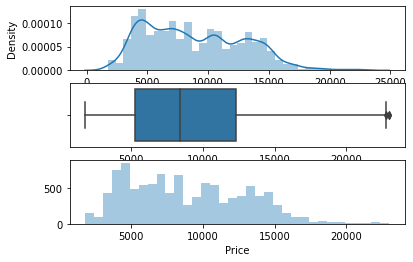

In [111]:
plot(dataset,"Price")

# Feature Selection

In [112]:
#I will use mutual information approach for feature selection 
#if value of mutual infromation is 0 that means 2 random variables (features) are completely independent
##if value of mutual infromation is close to 1 that means 2 random variables (features) are dependent

In [113]:
X = dataset.drop(['Price'],axis=1)
y = dataset['Price']

In [114]:
from sklearn.feature_selection import mutual_info_regression

In [115]:
imp = mutual_info_regression(X,y)

In [116]:
imp

array([0.97582591, 1.00144788, 0.78851237, 0.1967125 , 0.23757356,
       0.32630684, 0.25517974, 0.4009418 , 0.34097872, 0.46372991,
       0.34839006, 0.38896947, 0.45680111, 0.51569031, 0.13787047,
       0.19791593])

In [117]:
imp_df = pd.DataFrame(imp, index=X.columns)

In [118]:
imp_df.columns = ['importance']

In [119]:
imp_df

,importance
Airline,0.975826
Destination,1.001448
Total_Stops,0.788512
Journey_Day,0.196713
Journey_Month,0.237574
Dep_Time_hour,0.326307
Dep_Time_min,0.255180
Arrival_Time_hour,0.400942
Arrival_Time_min,0.340979
Duration_hour,0.463730


In [120]:
imp_df.sort_values(by='importance')

,importance
Source_Chennai,0.137870
Journey_Day,0.196713
Source_Mumbai,0.197916
Journey_Month,0.237574
Dep_Time_min,0.255180
Dep_Time_hour,0.326307
Arrival_Time_min,0.340979
Duration_min,0.348390
Source_Banglore,0.388969
Arrival_Time_hour,0.400942


# Model Building

In [121]:
#Random Forest

In [122]:
#RF used in regression as well as in classifications
#RF follow ensemble learning approach
#RF is collection of multiple Decision trees
#Decisions trees used in regression as well as in classifications
#Decision tree is a base algo which used in every ensemble technique such as Random Forest,XGBoost
#using contact of entropy and information gain we can get parent node for decision tree
#2 concept to build decision tree
#1.information gain & entropy 2. gini index (impurity)
#feature with highest informatio gain selected as parent node
#feature with lowest gini indext selected as parent node

In [123]:
#using Bagging (Bootstrap aggregation) we create multiple decision tree in random forest 
#bagging technique condiser that decision which predicted by majority of trees
#variance means difference between predictive (training data accuracy) and actual data (test data accuracy)
#random forest convert high variance into low variance thats the main characteristic of RF

In [124]:
#in case of regression RF do - 
#mean(dt1)+mean(dt2)+mean(dt3)

In [125]:
#in case of classification RF do-
#consider the majority (mode) of decision 

In [126]:
#75 percent training data
#25 percent testing data

In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [128]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [129]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [130]:
y_predict = model.predict(X_test)

In [131]:
y_predict

array([16763.36 ,  6268.76 ,  8960.52 , ...,  9209.81 ,  8646.09 ,
       11647.645])

In [132]:
#Evaluation of model

In [133]:
from sklearn import metrics

In [134]:
metrics.r2_score(y_test,y_predict)

0.8028055678900985

In [135]:
#accuracy close to 80 %

# Dumping the model

In [136]:
!pip install pickle 

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [137]:
import pickle

In [138]:
file = open(r'C:\Users\siddh/rk_random.pkl','wb')

In [139]:
pickle.dump(model,file)

In [140]:
dump_model = open(r'C:\Users\siddh/rk_random.pkl','rb')

In [141]:
forest = pickle.load(dump_model)

In [142]:
y_predict2 = forest.predict(X_test)

In [143]:
metrics.r2_score(y_test,y_predict2)

0.8028055678900985

# Evaluation Metrics

In [144]:
#defining function for mean absolute percentage error 

In [145]:
def mape(y_true, y_pred):
    y_true,y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true))*100

In [146]:
mape(y_test,y_predict2)

13.260298385502889

In [147]:
#defining function for mean squared error 

In [148]:
def mse(y_true,y_pred):
    y_true,y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((y_true - y_pred)**2) 

In [149]:
mse(y_test,y_predict2)

3231730.3723902297

In [150]:
#defining function for root mean squared error 

In [151]:
def rmse(y_true,y_pred):
    y_true,y_pred = np.array(y_true), np.array(y_pred)
    return np.sqrt(np.mean((y_true - y_pred)**2))

In [152]:
rmse(y_test,y_predict2)

1797.7014135807508

In [153]:
#defining function for R2 score

In [154]:
from sklearn.metrics import r2_score

In [155]:
def r2score(y_true,y_pred):
    y_true,y_pred = np.array(y_true), np.array(y_pred)
    return r2_score(y_true,y_pred)

In [156]:
r2score(y_test,y_predict2)

0.8028055678900985

# Automating Machine Learning Pipeline

In [157]:
def predict(ml_model):
    model = ml_model.fit(X_train,y_train)
    print('Training score: {}'.format(model.score(X_train,y_train)))
    y_prediction = model.predict(X_test)
    print("Prediction are: {}".format(y_prediction))
    print("\n")
    r2 = r2_score(y_test,y_prediction)
    print("r2 score: {}".format(r2))
    print("MAE: {}".format(metrics.mean_absolute_error(y_test,y_prediction)))
    print("MSE: {}".format(metrics.mean_squared_error(y_test,y_prediction)))
    print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test,y_prediction))))
    print("MAPE: {}".format(mape(y_test,y_prediction)))
    sns.distplot(y_test - y_prediction)

Training score: 0.948991303478555
Prediction are: [16775.67   6393.13   8839.25  ...  9125.38   8940.    12056.751]


r2 score: 0.8040721583161808
MAE: 1156.7017024404977
MSE: 3210972.794675927
RMSE: 1791.9187466723838
MAPE: 13.212376439123794


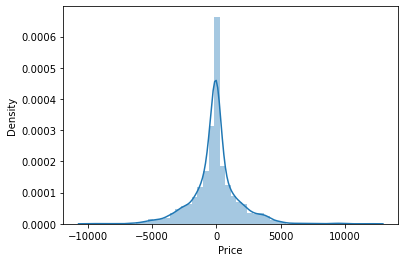

In [158]:
predict(RandomForestRegressor())

In [161]:
from sklearn.tree import DecisionTreeRegressor

Training score: 0.9653788728964107
Prediction are: [16840.   5135.   9397.  ...  8422.  10141.  11652.5]


r2 score: 0.6837211018265531
MAE: 1348.4442285876346
MSE: 5183351.834211965
RMSE: 2276.6975719695324
MAPE: 15.303087692044425


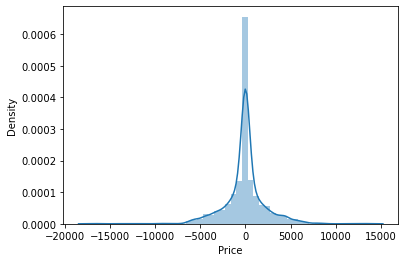

In [162]:
predict(DecisionTreeRegressor())

In [163]:
from sklearn.linear_model import LinearRegression

Training score: 0.6091180913989205
Prediction are: [12665.38399359  8574.24129298  8978.49814955 ...  7723.13606021
  7211.27257115 10849.97054377]


r2 score: 0.6093279977837744
MAE: 1890.9263266145592
MSE: 6402546.774246798
RMSE: 2530.3254285262988
MAPE: 23.464324002432534


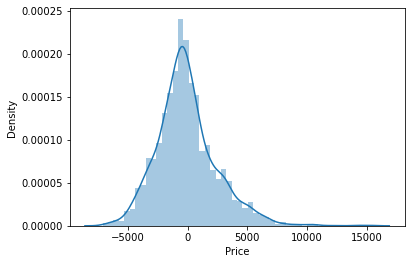

In [164]:
predict(LinearRegression())

# Hyper Tuning Machine Learning Model

In [ ]:
#optimizing hyper paramter of machine learning algorithm

In [166]:
from sklearn.model_selection import RandomizedSearchCV

In [167]:
reg_rf = RandomForestRegressor()

In [168]:
np.linspace(start = 100, stop = 1200, num = 6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [169]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 6)]
#n_estimators means number of trees in random forest

In [170]:
max_features = ["auto","sqrt"]

In [171]:
#maximum numbers of levels in decision tree
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 4)]

In [172]:
min_samples_split = [5,10,15,100]

In [173]:
random_grid = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split
}

In [175]:
#hyperparameter space
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [176]:
rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions = random_grid, cv=3, n_jobs=-1, verbose=2)

In [177]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   42.1s finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [179]:
#optimized parameter value
rf_random.best_params_

{'n_estimators': 320,
 'min_samples_split': 15,
 'max_features': 'auto',
 'max_depth': 21}

In [180]:
#this algo will give you best score
#best optimized model
rf_random.best_estimator_

RandomForestRegressor(max_depth=21, min_samples_split=15, n_estimators=320)

In [181]:
#best score
rf_random.best_score_

0.8012777236910987

In [ ]:
## End of the Project